# ANALISIS EXPLORATORIO PREVIO (EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dfm_accidentes = pd.read_csv('madrid_accidentes_final.csv',encoding='latin1')

In [4]:
dfm_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86817 entries, 0 to 86816
Data columns (total 32 columns):
FECHA                  86817 non-null object
RANGO_HORARIO          86817 non-null object
DIA_SEMANA             86817 non-null object
DISTRITO               86817 non-null object
LUGAR_ACCIDENTE        86817 non-null object
NUM_CALLE              85528 non-null float64
NUM_PARTE              86817 non-null object
Granizo                86817 non-null int64
Hielo                  86817 non-null int64
Lluvia                 86817 non-null int64
Niebla                 86817 non-null int64
Seco                   86817 non-null int64
Nieve                  86817 non-null int64
supf_Mojada            86817 non-null int64
supf_Aceite            86817 non-null int64
supf_Barro             86817 non-null int64
supf_Grava_Suelta      86817 non-null int64
supf_Hielo             86817 non-null int64
supf_Seca_Limpia       86817 non-null int64
NUM_VICTIMAS           86817 non-null int64
TIP

In [5]:
dfm_accidentes.head(10)

,FECHA,RANGO_HORARIO,DIA_SEMANA,DISTRITO,LUGAR_ACCIDENTE,NUM_CALLE,NUM_PARTE,Granizo,Hielo,Lluvia,...,tipo_persona_implic,n_hombres,n_mujeres,n_sex_na,n_ilesos,n_hgraves,n_hleves,n_muertos,n_lesiv_na,tr_edad_implic
0,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104.0,2010/135,0,0,1,...,CONDUCTOR_CONDUCTOR_VIAJERO,2,1,0,2,0,1,0,0,DE 18 A 20 AÑOS_DE 50 A 54 AÑOS_DE 40 A 44 AÑOS
1,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200.0,2010/94,0,0,0,...,VIAJERO_VIAJERO_VIAJERO_VIAJERO_CONDUCTOR_COND...,2,6,0,1,0,7,0,0,DE 25 A 29 AÑOS_DE 30 A 34 ANOS_DE 25 A 29 AÑO...
2,2010-01-01,DE 2:00 A 2:59,VIERNES,CHAMBERI,GLORIETA DE EMILIO CASTELAR - PASEO DE LA CAST...,0.0,2010/7,0,0,0,...,CONDUCTOR_CONDUCTOR,2,0,0,1,0,1,0,0,DE 35 A 39 AÑOS_DE 35 A 39 AÑOS
3,2010-01-01,DE 4:00 A 4:59,VIERNES,RETIRO,AUTOVIA M-30 CALZADA 1 KM.,8500.0,2010/4,0,0,0,...,TESTIGO_TESTIGO_CONDUCTOR_VIAJERO_VIAJERO_VIAJ...,7,4,0,4,1,6,0,0,DE 25 A 29 AÑOS_DE 30 A 34 ANOS_DE 25 A 29 AÑO...
4,2010-01-01,DE 5:00 A 5:59,VIERNES,SALAMANCA,CALLE DE O'DONNELL - CALLE DEL DOCTOR ESQUERDO,0.0,2010/172,0,0,0,...,CONDUCTOR_CONDUCTOR_VIAJERO,2,1,0,2,0,1,0,0,DE 60 A 64 AÑOS_DE 25 A 29 AÑOS_DE 25 A 29 AÑOS
5,2010-01-01,DE 8:00 A 8:59,VIERNES,CARABANCHEL,PASEO DE SANTA MARIA DE LA CABEZA NUM,100.0,2010/6,0,0,0,...,CONDUCTOR_VIAJERO,2,0,0,0,0,2,0,0,DE 35 A 39 AÑOS_DE 45 A 49 AÑOS
6,2010-01-01,DE 9:00 A 9:59,VIERNES,CIUDAD LINEAL,AUTOVIA M-30 CALZADA 2 KM.,0.0,2010/193,0,0,1,...,CONDUCTOR,1,0,0,0,0,1,0,0,DE 30 A 34 ANOS
7,2010-01-01,DE 9:00 A 9:59,VIERNES,MONCLOA-ARAVACA,AUTOVIA M-30 CALZADA 1 KM.,20300.0,2010/195,0,0,1,...,CONDUCTOR,1,0,0,0,0,1,0,0,DE 25 A 29 AÑOS
8,2010-01-01,DE 9:00 A 9:59,VIERNES,SALAMANCA,AUTOVIA M-30 CALZADA 1 KM.,5000.0,2010/203,0,0,1,...,TESTIGO_TESTIGO_TESTIGO_CONDUCTOR,3,1,0,3,1,0,0,0,DE 21 A 24 AÑOS_DE 21 A 24 AÑOS_DE 21 A 24 AÑO...
9,2010-01-01,DE 20:00 A 20:59,VIERNES,TETUAN,CALLE DEL ARROYO - CALLE DE PINOS BAJA,0.0,2010/21,0,0,0,...,TESTIGO_CONDUCTOR_CONDUCTOR_VIAJERO_VIAJERO,4,1,0,4,0,1,0,0,DE 18 A 20 AÑOS_DE 35 A 39 AÑOS_DE 35 A 39 AÑO...


## VALORES PERDIDOS.

In [6]:
total = dfm_accidentes.isnull().sum().sort_values(ascending=False)
percent = (dfm_accidentes.isnull().sum()/dfm_accidentes.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent
NUM_CALLE,1289,0.014847


In [7]:
dfm_accidentes.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'LUGAR_ACCIDENTE',
       'NUM_CALLE', 'NUM_PARTE', 'Granizo', 'Hielo', 'Lluvia', 'Niebla',
       'Seco', 'Nieve', 'supf_Mojada', 'supf_Aceite', 'supf_Barro',
       'supf_Grava_Suelta', 'supf_Hielo', 'supf_Seca_Limpia', 'NUM_VICTIMAS',
       'TIPO_ACCIDENTE', 'vehiculos_implic', 'tipo_persona_implic',
       'n_hombres', 'n_mujeres', 'n_sex_na', 'n_ilesos', 'n_hgraves',
       'n_hleves', 'n_muertos', 'n_lesiv_na', 'tr_edad_implic'],
      dtype='object')

In [8]:
var_texto = ['RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'LUGAR_ACCIDENTE','NUM_PARTE','TIPO_ACCIDENTE', 'vehiculos_implic', \
             'tipo_persona_implic', 'tr_edad_implic']

for col in var_texto:
    print(col,':',sum(dfm_accidentes[col].str.len()==0))

RANGO_HORARIO : 0
DIA_SEMANA : 0
DISTRITO : 0
LUGAR_ACCIDENTE : 0
NUM_PARTE : 0
TIPO_ACCIDENTE : 0
vehiculos_implic : 0
tipo_persona_implic : 0
tr_edad_implic : 0


In [9]:
def conteo(col,tabla=False):
    print(col.name,'\n')
    print('Nº valores unicos:',len(col.unique()),'\n')
    print('Valores unicos:',col.unique()[:25],'\n')
    if tabla:
        print(col.value_counts())
    print('\n')

## ¿CUANDO?

In [10]:
dfm_accidentes[['RANGO_HORARIO','DIA_SEMANA']].apply(conteo)

RANGO_HORARIO 

Nº valores unicos: 24 

Valores unicos: ['DE 00:00 A 00:59' 'DE 1:00 A 1:59' 'DE 2:00 A 2:59' 'DE 4:00 A 4:59'
 'DE 5:00 A 5:59' 'DE 8:00 A 8:59' 'DE 9:00 A 9:59' 'DE 20:00 A 20:59'
 'DE 21:00 A 21:59' 'DE 6:00 A 6:59' 'DE 11:00 A 11:59' 'DE 12:00 A 12:59'
 'DE 13:00 A 13:59' 'DE 14:00 A 14:59' 'DE 15:00 A 15:59'
 'DE 18:00 A 18:59' 'DE 19:00 A 19:59' 'DE 22:00 A 22:59'
 'DE 16:00 A 16:59' 'DE 17:00 A 17:59' 'DE 23:00 A 23:59' 'DE 7:00 A 7:59'
 'DE 10:00 A 10:59' 'DE 3:00 A 3:59'] 



DIA_SEMANA 

Nº valores unicos: 7 

Valores unicos: ['VIERNES' 'SABADO' 'DOMINGO' 'LUNES' 'MARTES' 'MIERCOLES' 'JUEVES'] 





RANGO_HORARIO    None
DIA_SEMANA       None
dtype: object

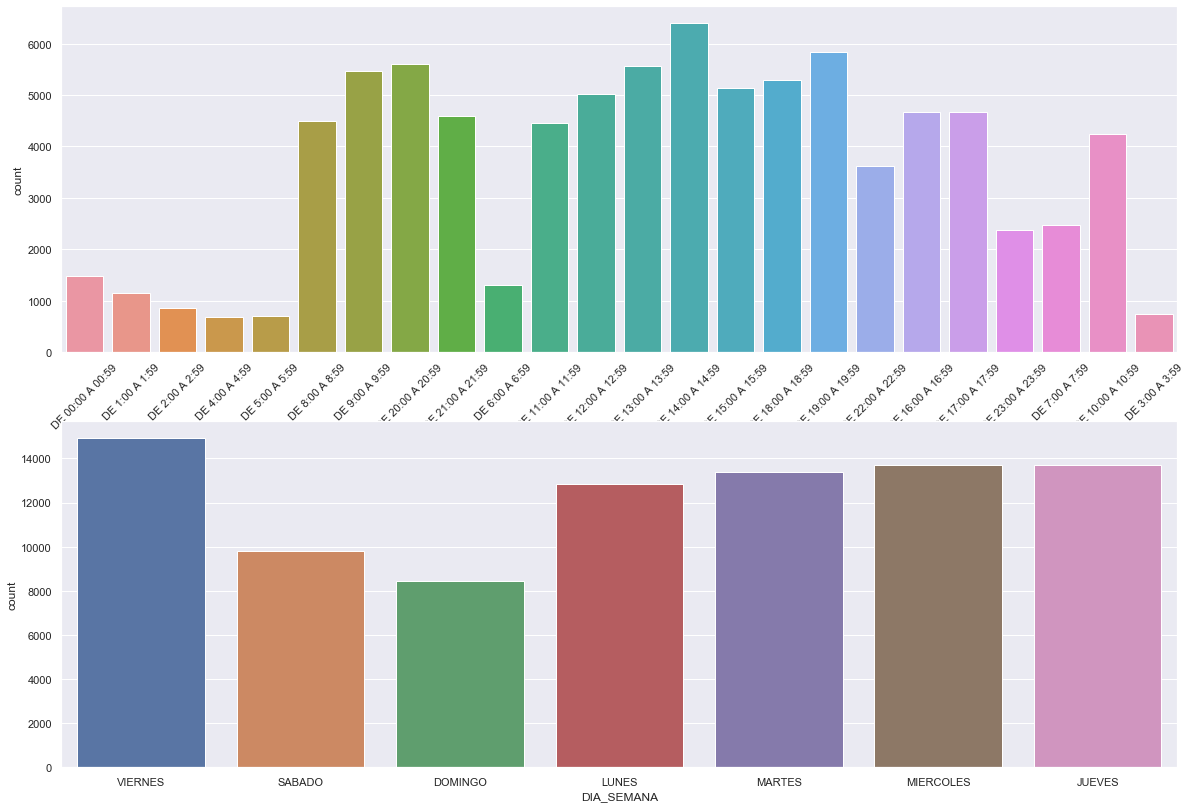

In [11]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(20,14))

ax1 = fig.add_subplot(211)
bar1 = sns.countplot(x="RANGO_HORARIO", data=dfm_accidentes)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45)

ax2 = fig.add_subplot(212)
sns.countplot(x="DIA_SEMANA", data=dfm_accidentes)

## ¿DONDE?

In [12]:
dfm_accidentes[['DISTRITO', 'LUGAR_ACCIDENTE','NUM_CALLE']].apply(conteo)


DISTRITO 

Nº valores unicos: 21 

Valores unicos: ['CHAMARTIN' 'PUENTE DE VALLECAS' 'CHAMBERI' 'RETIRO' 'SALAMANCA'
 'CARABANCHEL' 'CIUDAD LINEAL' 'MONCLOA-ARAVACA' 'TETUAN'
 'VILLA DE VALLECAS' 'MORATALAZ' 'ARGANZUELA' 'SAN BLAS' 'VILLAVERDE'
 'HORTALEZA' 'FUENCARRAL-EL PARDO' 'VICALVARO' 'USERA' 'LATINA' 'BARAJAS'
 'CENTRO'] 



LUGAR_ACCIDENTE 

Nº valores unicos: 16320 

Valores unicos: ['CALLE DE CARTAGENA NUM' 'AUTOVIA  M-30 CALZADA 2 KM.'
 'GLORIETA DE EMILIO CASTELAR - PASEO DE LA CASTELLANA'
 'AUTOVIA  M-30 CALZADA 1 KM.'
 "CALLE DE O'DONNELL - CALLE DEL DOCTOR ESQUERDO"
 'PASEO DE SANTA MARIA DE LA CABEZA NUM'
 'CALLE DEL ARROYO - CALLE DE PINOS BAJA'
 'CALLE DE ARGENTINA - CALLE DE SAMBARA'
 'PLAZA DE CASTILLA - AVENIDA DE ASTURIAS'
 'CAMINO DEL SANTISIMO - CALLE DEL ALTO DEL RETIRO'
 'CALLE DE HILARION ESLAVA NUM' 'AUTOVIA  M-23 SALIDA KM.'
 'CALLE DE VALDEBERNARDO - CALLE DE LA HACIENDA DE PAVONES'
 'AVENIDA DE LA PAZ - CALLE DE ANTONIA CALAS'
 'CALLE DE ROBERTO DOMINGO N

DISTRITO           None
LUGAR_ACCIDENTE    None
NUM_CALLE          None
dtype: object

[Text(0, 0, 'CHAMARTIN'),
 Text(0, 0, 'PUENTE DE VALLECAS'),
 Text(0, 0, 'CHAMBERI'),
 Text(0, 0, 'RETIRO'),
 Text(0, 0, 'SALAMANCA'),
 Text(0, 0, 'CARABANCHEL'),
 Text(0, 0, 'CIUDAD LINEAL'),
 Text(0, 0, 'MONCLOA-ARAVACA'),
 Text(0, 0, 'TETUAN'),
 Text(0, 0, 'VILLA DE VALLECAS'),
 Text(0, 0, 'MORATALAZ'),
 Text(0, 0, 'ARGANZUELA'),
 Text(0, 0, 'SAN BLAS'),
 Text(0, 0, 'VILLAVERDE'),
 Text(0, 0, 'HORTALEZA'),
 Text(0, 0, 'FUENCARRAL-EL PARDO'),
 Text(0, 0, 'VICALVARO'),
 Text(0, 0, 'USERA'),
 Text(0, 0, 'LATINA'),
 Text(0, 0, 'BARAJAS'),
 Text(0, 0, 'CENTRO')]

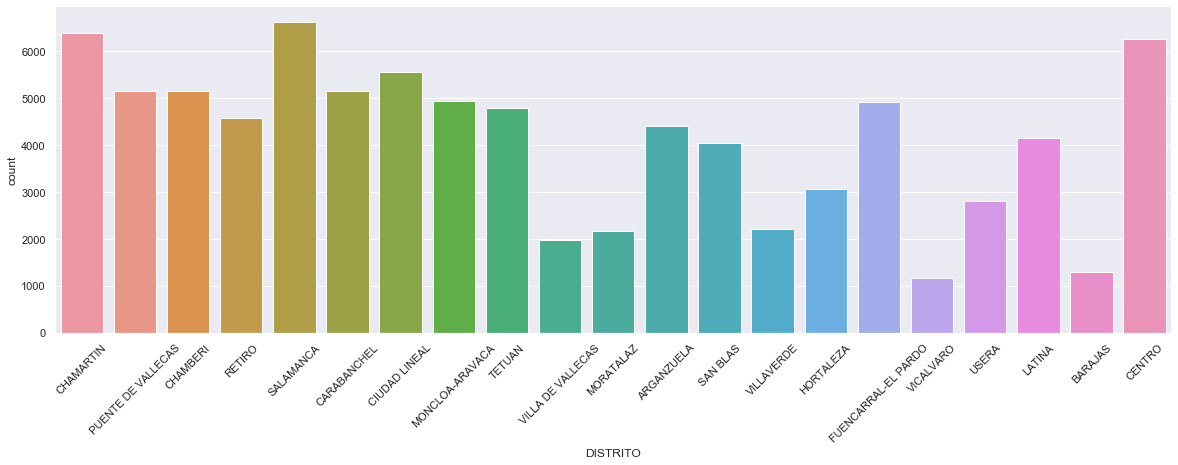

In [13]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(111)
bar1 = sns.countplot(x="DISTRITO", data=dfm_accidentes)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45)


## CONDICIONES AMBIENTALES

In [14]:
dfm_accidentes.loc[:,'Granizo':'Nieve'].apply(conteo,tabla=True)

Granizo 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86807
1       10
Name: Granizo, dtype: int64


Hielo 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86703
1      114
Name: Hielo, dtype: int64


Lluvia 

Nº valores unicos: 2 

Valores unicos: [1 0] 

0    76032
1    10785
Name: Lluvia, dtype: int64


Niebla 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86579
1      238
Name: Niebla, dtype: int64


Seco 

Nº valores unicos: 2 

Valores unicos: [0 1] 

1    75651
0    11166
Name: Seco, dtype: int64


Nieve 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86688
1      129
Name: Nieve, dtype: int64




Granizo    None
Hielo      None
Lluvia     None
Niebla     None
Seco       None
Nieve      None
dtype: object

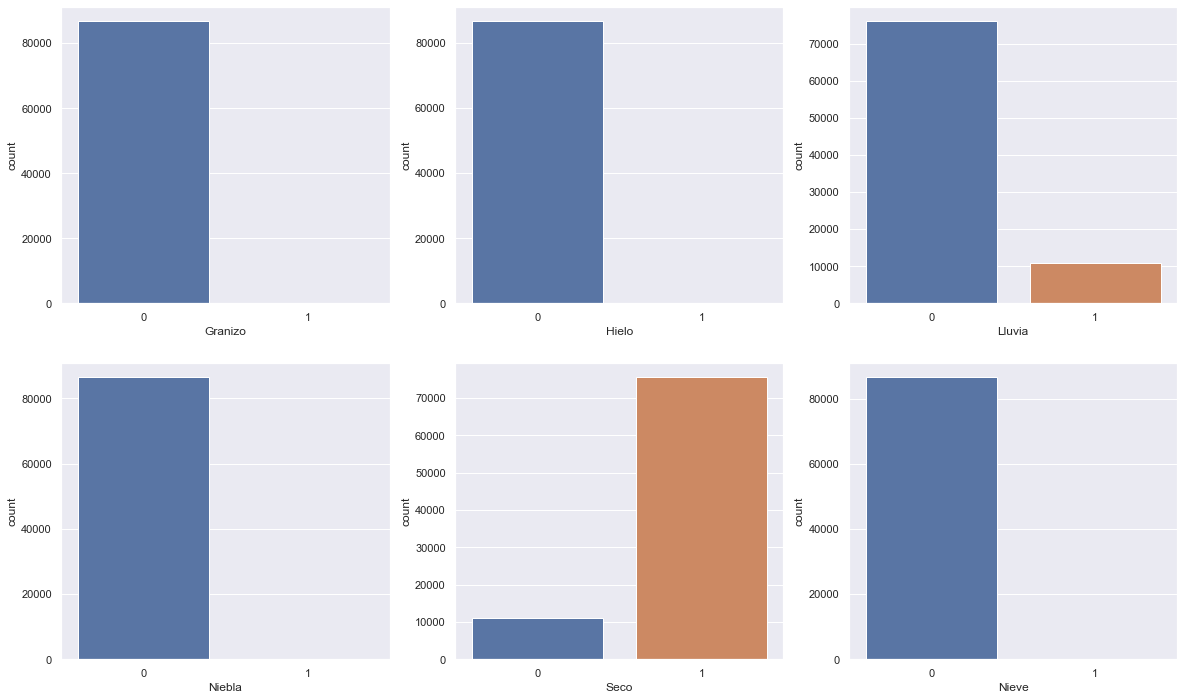

In [15]:
fig_amb = plt.figure(figsize=(20,12))

ax1=fig_amb.add_subplot(231)
bar1=sns.countplot(x="Granizo", data=dfm_accidentes)

ax2=fig_amb.add_subplot(232)
bar2=sns.countplot(x="Hielo", data=dfm_accidentes)

ax3=fig_amb.add_subplot(233)
bar3=sns.countplot(x="Lluvia", data=dfm_accidentes)

ax4=fig_amb.add_subplot(234)
bar4=sns.countplot(x="Niebla", data=dfm_accidentes)

ax5=fig_amb.add_subplot(235)
bar5=sns.countplot(x="Seco", data=dfm_accidentes)

ax6=fig_amb.add_subplot(236)
bar6=sns.countplot(x="Nieve", data=dfm_accidentes)


## CONDICIONES DE LA CARRETERA

In [16]:
dfm_accidentes.loc[:,'supf_Mojada':'supf_Seca_Limpia'].apply(conteo,tabla=True)


supf_Mojada 

Nº valores unicos: 2 

Valores unicos: [1 0] 

0    74350
1    12467
Name: supf_Mojada, dtype: int64


supf_Aceite 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86499
1      318
Name: supf_Aceite, dtype: int64


supf_Barro 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86712
1      105
Name: supf_Barro, dtype: int64


supf_Grava_Suelta 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86460
1      357
Name: supf_Grava_Suelta, dtype: int64


supf_Hielo 

Nº valores unicos: 2 

Valores unicos: [0 1] 

0    86644
1      173
Name: supf_Hielo, dtype: int64


supf_Seca_Limpia 

Nº valores unicos: 2 

Valores unicos: [0 1] 

1    73163
0    13654
Name: supf_Seca_Limpia, dtype: int64




supf_Mojada          None
supf_Aceite          None
supf_Barro           None
supf_Grava_Suelta    None
supf_Hielo           None
supf_Seca_Limpia     None
dtype: object

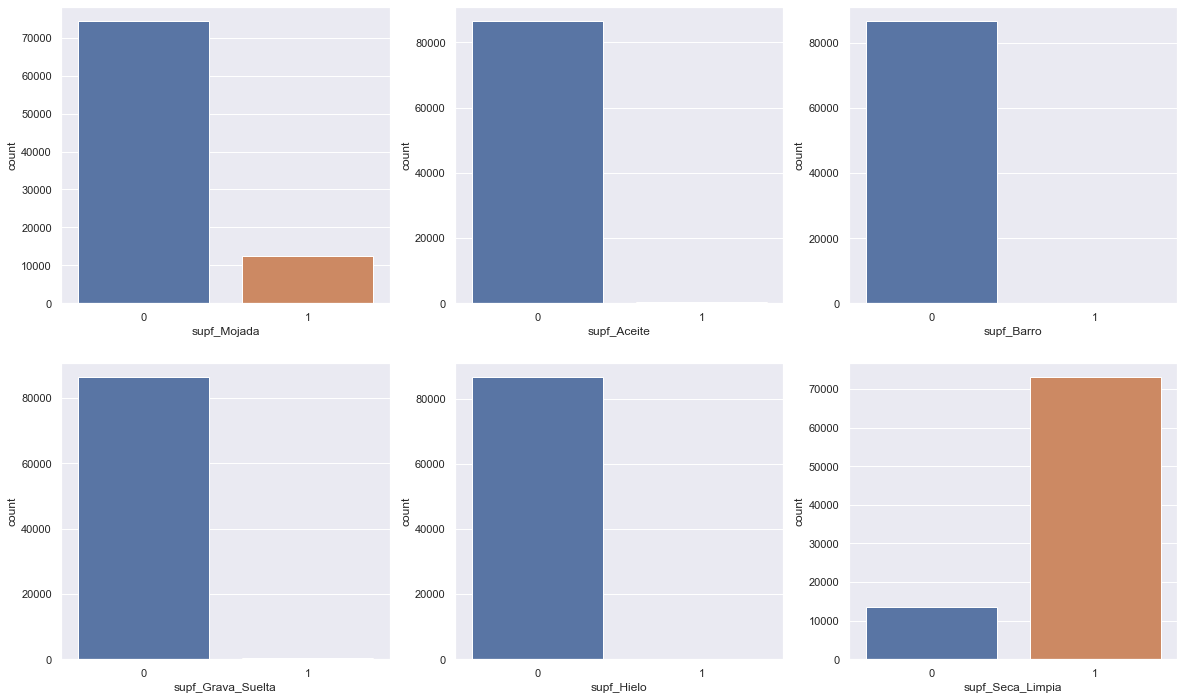

In [17]:
fig_carret = plt.figure(figsize=(20,12))

ax1=fig_carret.add_subplot(231)
bar1=sns.countplot(x="supf_Mojada", data=dfm_accidentes)

ax2=fig_carret.add_subplot(232)
bar2=sns.countplot(x="supf_Aceite", data=dfm_accidentes)

ax3=fig_carret.add_subplot(233)
bar3=sns.countplot(x="supf_Barro", data=dfm_accidentes)

ax4=fig_carret.add_subplot(234)
bar4=sns.countplot(x="supf_Grava_Suelta", data=dfm_accidentes)

ax5=fig_carret.add_subplot(235)
bar5=sns.countplot(x="supf_Hielo", data=dfm_accidentes)

ax6=fig_carret.add_subplot(236)
bar6=sns.countplot(x="supf_Seca_Limpia", data=dfm_accidentes)


## VICTIMAS Y LESIVIDAD.

### 1. TOTALES.

In [18]:
tot_victim, tot_ilesos = sum(dfm_accidentes.NUM_VICTIMAS), sum(dfm_accidentes.n_ilesos)
tot_leves, tot_graves = sum(dfm_accidentes.n_hleves), sum(dfm_accidentes.n_hgraves)
tot_muertos, tot_na = sum(dfm_accidentes.n_muertos), sum(dfm_accidentes.n_lesiv_na)

sergrafvictim = pd.Series({'num_victimas': tot_victim, 'num_ilesos': tot_ilesos, 'num_leves': tot_leves, \
                            'num_graves': tot_graves, 'num_muertos': tot_muertos, 'num_na': tot_na})

sergrafvictim

num_victimas    111841
num_ilesos      130053
num_leves       102716
num_graves        8850
num_muertos        275
num_na           11104
dtype: int64

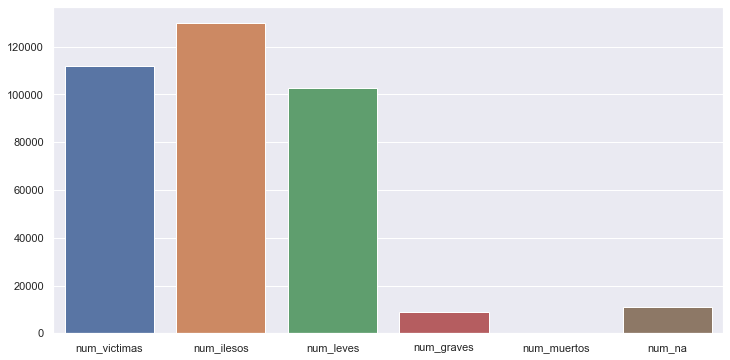

In [19]:
fig_vict = plt.figure(figsize=(12,6))

sns.barplot(x=sergrafvictim.index, y=sergrafvictim.values)

### 2. POR ACCIDENTE.

In [20]:
dfm_accidentes[['NUM_VICTIMAS','n_ilesos', 'n_hgraves','n_hleves', 'n_muertos', 'n_lesiv_na']].apply(conteo,tabla=True)

NUM_VICTIMAS 

Nº valores unicos: 19 

Valores unicos: [ 1  7  2  3  4  5  9  6  8 18 13 11 22 10 14 12 16 19 15] 

1     69849
2     12092
3      3075
4      1089
5       415
6       146
7        83
8        27
9        13
10       10
11        4
13        3
19        2
12        2
14        2
18        2
15        1
16        1
22        1
Name: NUM_VICTIMAS, dtype: int64


n_ilesos 

Nº valores unicos: 16 

Valores unicos: [ 2  1  4  0  3  6  5  8  7  9 10 12 24 13 11 16] 

1     34631
2     22763
0     15394
3      9202
4      3038
5      1114
6       413
7       139
8        58
9        38
10       11
11        9
12        3
13        2
24        1
16        1
Name: n_ilesos, dtype: int64


n_hgraves 

Nº valores unicos: 9 

Valores unicos: [ 0  1  2  3  6  4  7  5 10] 

0     78589
1      7727
2       428
3        47
4        15
5         6
7         2
6         2
10        1
Name: n_hgraves, dtype: int64


n_hleves 

Nº valores unicos: 20 

Valores unicos: [ 1  7  6  2  0  3  4 

NUM_VICTIMAS    None
n_ilesos        None
n_hgraves       None
n_hleves        None
n_muertos       None
n_lesiv_na      None
dtype: object

In [1]:
69849/86817

0.804554407546909

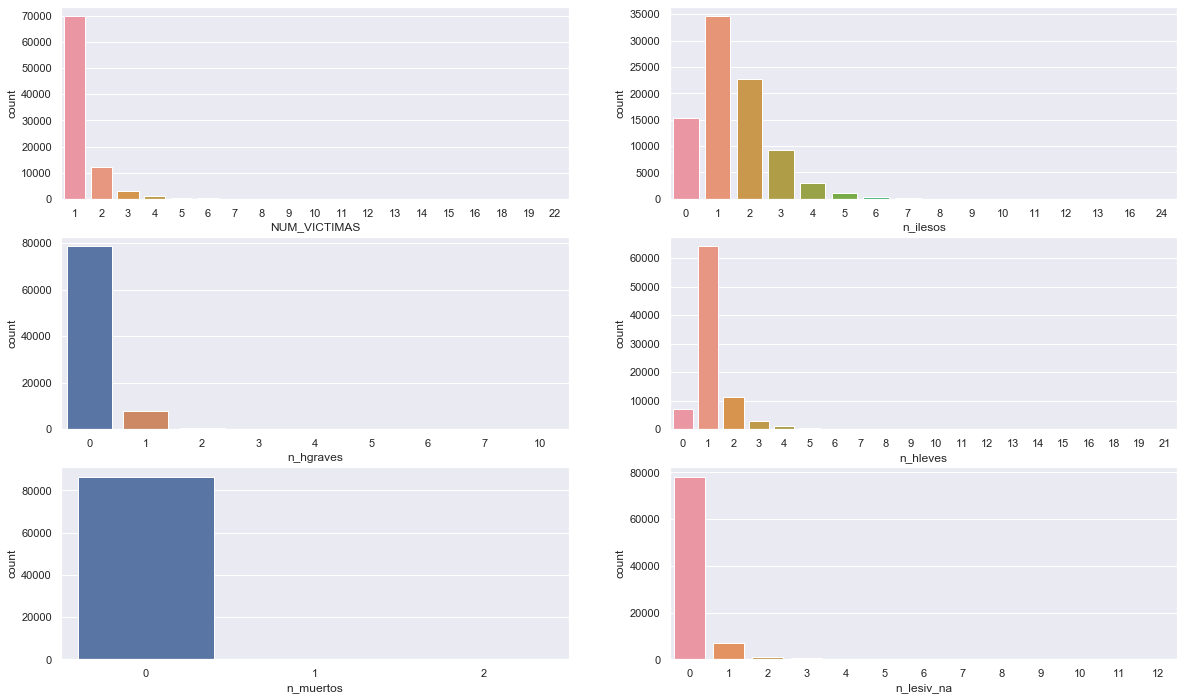

In [21]:
fig_vict = plt.figure(figsize=(20,12))

ax1=fig_vict.add_subplot(321)
bar1=sns.countplot(x='NUM_VICTIMAS', data=dfm_accidentes)

ax2=fig_vict.add_subplot(322)
bar2=sns.countplot(x="n_ilesos", data=dfm_accidentes)

ax3=fig_vict.add_subplot(323)
bar3=sns.countplot(x="n_hgraves", data=dfm_accidentes)

ax4=fig_vict.add_subplot(324)
bar4=sns.countplot(x="n_hleves", data=dfm_accidentes)

ax5=fig_vict.add_subplot(325)
bar5=sns.countplot(x="n_muertos", data=dfm_accidentes)

ax6=fig_vict.add_subplot(326)
bar6=sns.countplot(x="n_lesiv_na", data=dfm_accidentes)


## TIPO ACCIDENTE

In [22]:
dfm_accidentes.TIPO_ACCIDENTE.value_counts()

COLISIÓN DOBLE             48001
ATROPELLO                  13671
CAÍDA MOTOCICLETA           8358
COLISIÓN MÚLTIPLE           6384
CHOQUE CON OBJETO FIJO      5217
CAÍDA BICICLETA             1778
CAÍDA CICLOMOTOR            1642
CAÍDA VIAJERO BUS            829
VUELCO                       579
OTRAS CAUSAS                 352
CAÍDA VEHÍCULO 3 RUEDAS        6
Name: TIPO_ACCIDENTE, dtype: int64

[Text(0, 0, 'COLISIÓN DOBLE'),
 Text(0, 0, 'COLISIÓN MÚLTIPLE'),
 Text(0, 0, 'CHOQUE CON OBJETO FIJO'),
 Text(0, 0, 'CAÍDA MOTOCICLETA'),
 Text(0, 0, 'ATROPELLO'),
 Text(0, 0, 'VUELCO'),
 Text(0, 0, 'CAÍDA CICLOMOTOR'),
 Text(0, 0, 'CAÍDA VIAJERO BUS'),
 Text(0, 0, 'OTRAS CAUSAS'),
 Text(0, 0, 'CAÍDA BICICLETA'),
 Text(0, 0, 'CAÍDA VEHÍCULO 3 RUEDAS')]

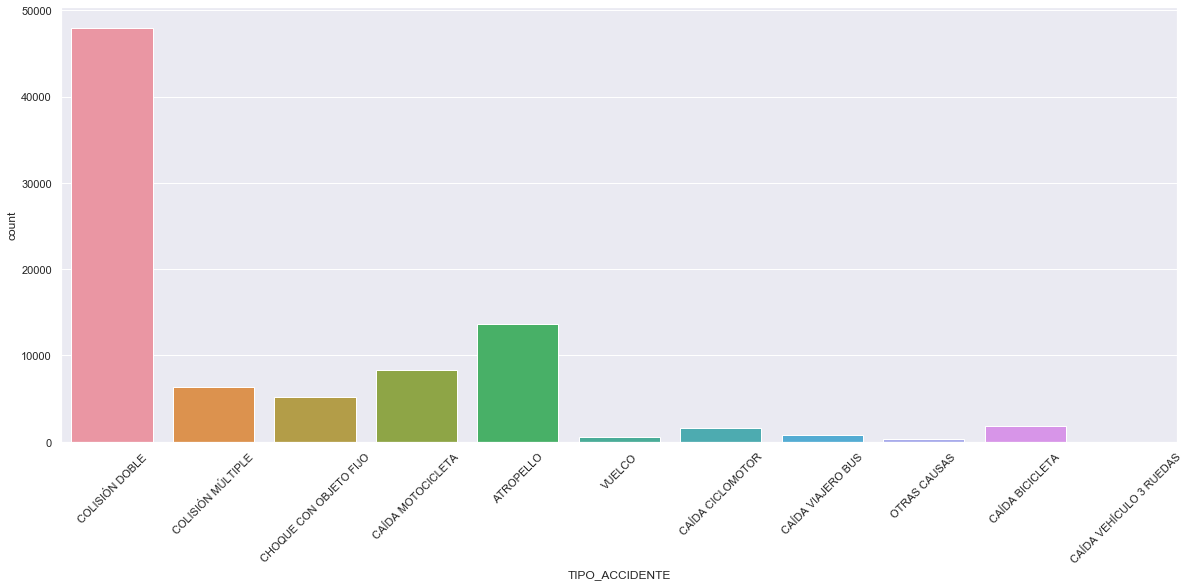

In [23]:
figtipo = plt.figure(figsize=(20,8))

ax1 = figtipo.add_subplot(111)
bar1 = sns.countplot(x="TIPO_ACCIDENTE", data=dfm_accidentes)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45)

## CARACTERISTICAS VICTIMA

In [24]:
df_por_victima = pd.read_csv('./madrid_accid.csv',encoding='latin1',usecols=['SEXO','Tramo_Edad'])

df_por_victima.apply(conteo, tabla=True)

SEXO 

Nº valores unicos: 3 

Valores unicos: ['HOMBRE' 'MUJER' 'NO ASIGNADO'] 

HOMBRE         160165
MUJER           80717
NO ASIGNADO     12116
Name: SEXO, dtype: int64


Tramo_Edad 

Nº valores unicos: 18 

Valores unicos: ['DE 18 A 20 AÑOS' 'DE 50 A 54 AÑOS' 'DE 40 A 44 AÑOS' 'DE 25 A 29 AÑOS'
 'DE 30 A 34 ANOS' 'DE 21 A 24 AÑOS' 'DE 35 A 39 AÑOS' 'DE 60 A 64 AÑOS'
 'DE 45 A 49 AÑOS' 'DE 0 A 5 AÑOS' 'DESCONOCIDA' 'DE 70 A 74 AÑOS'
 'DE MAS DE 74 AÑOS' 'DE 10 A 14 AÑOS' 'DE 6 A 9 AÑOS' 'DE 55 A 59 AÑOS'
 'DE 65 A 69 AÑOS' 'DE 15 A 17 AÑOS'] 

DE 30 A 34 ANOS      31110
DE 35 A 39 AÑOS      30169
DE 25 A 29 AÑOS      29797
DE 40 A 44 AÑOS      26421
DE 45 A 49 AÑOS      22167
DESCONOCIDA          19724
DE 21 A 24 AÑOS      19532
DE 50 A 54 AÑOS      17999
DE 55 A 59 AÑOS      12454
DE 18 A 20 AÑOS       9304
DE 60 A 64 AÑOS       8362
DE MAS DE 74 AÑOS     6361
DE 65 A 69 AÑOS       5097
DE 70 A 74 AÑOS       3656
DE 0 A 5 AÑOS         3128
DE 10 A 14 AÑOS       2804
DE 15 A 17 AÑOS

SEXO          None
Tramo_Edad    None
dtype: object

[Text(0, 0, 'DE 18 A 20 AÑOS'),
 Text(0, 0, 'DE 50 A 54 AÑOS'),
 Text(0, 0, 'DE 40 A 44 AÑOS'),
 Text(0, 0, 'DE 25 A 29 AÑOS'),
 Text(0, 0, 'DE 30 A 34 ANOS'),
 Text(0, 0, 'DE 21 A 24 AÑOS'),
 Text(0, 0, 'DE 35 A 39 AÑOS'),
 Text(0, 0, 'DE 60 A 64 AÑOS'),
 Text(0, 0, 'DE 45 A 49 AÑOS'),
 Text(0, 0, 'DE 0 A 5 AÑOS'),
 Text(0, 0, 'DESCONOCIDA'),
 Text(0, 0, 'DE 70 A 74 AÑOS'),
 Text(0, 0, 'DE MAS DE 74 AÑOS'),
 Text(0, 0, 'DE 10 A 14 AÑOS'),
 Text(0, 0, 'DE 6 A 9 AÑOS'),
 Text(0, 0, 'DE 55 A 59 AÑOS'),
 Text(0, 0, 'DE 65 A 69 AÑOS'),
 Text(0, 0, 'DE 15 A 17 AÑOS')]

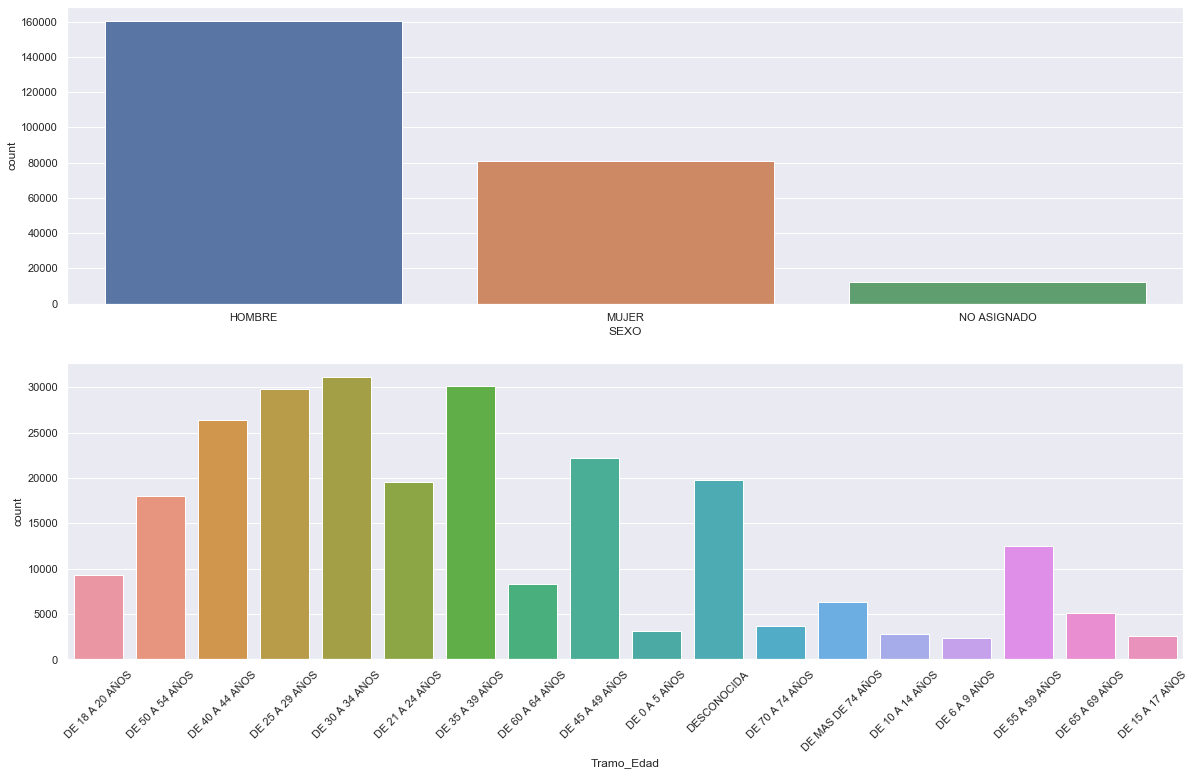

In [25]:
fig_porvict = plt.figure(figsize=(20,12))

ax1=fig_porvict.add_subplot(211)
bar1=sns.countplot(x='SEXO', data=df_por_victima)

ax2=fig_porvict.add_subplot(212)
bar2=sns.countplot(x="Tramo_Edad", data=df_por_victima)
bar2.set_xticklabels(bar2.get_xticklabels(), rotation=45)

**POSIBLES VARIABLES TARGET**

<ul>
<li>número de victimas -> discretizar</li>
<li>por gravedad -> categórica a partir pesos por lesividad, o por muertes</li>
<li>tipo de accidente -> categórica, estudiar relacion variables</li>
<li>edad del conductor -> filtrando por TIPO_PERSONA, quizas unir categorias</li>
</ul>

## DISCRETIZACION Y RECODIFICACION ATRIBUTOS

In [26]:
dfm_accidentes.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'LUGAR_ACCIDENTE',
       'NUM_CALLE', 'NUM_PARTE', 'Granizo', 'Hielo', 'Lluvia', 'Niebla',
       'Seco', 'Nieve', 'supf_Mojada', 'supf_Aceite', 'supf_Barro',
       'supf_Grava_Suelta', 'supf_Hielo', 'supf_Seca_Limpia', 'NUM_VICTIMAS',
       'TIPO_ACCIDENTE', 'vehiculos_implic', 'tipo_persona_implic',
       'n_hombres', 'n_mujeres', 'n_sex_na', 'n_ilesos', 'n_hgraves',
       'n_hleves', 'n_muertos', 'n_lesiv_na', 'tr_edad_implic'],
      dtype='object')

### NUM_VICTIMAS

In [27]:
nvict_interv = [0,2,5,10,25]
num_vict_discrt = pd.cut(dfm_accidentes.NUM_VICTIMAS, nvict_interv)

num_vict_discrt.value_counts()

(0, 2]      81941
(2, 5]       4579
(5, 10]       279
(10, 25]       18
Name: NUM_VICTIMAS, dtype: int64

In [28]:
num_vict_discrt[:10]

0     (0, 2]
1    (5, 10]
2     (0, 2]
3    (5, 10]
4     (0, 2]
5     (0, 2]
6     (0, 2]
7     (0, 2]
8     (0, 2]
9     (0, 2]
Name: NUM_VICTIMAS, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 5] < (5, 10] < (10, 25]]

### RANGO_HORARIO

In [29]:
dfm_accidentes.RANGO_HORARIO.head()

0    DE 00:00 A 00:59
1      DE 1:00 A 1:59
2      DE 2:00 A 2:59
3      DE 4:00 A 4:59
4      DE 5:00 A 5:59
Name: RANGO_HORARIO, dtype: object

In [30]:
def extraer_hora(col):
    
    horas = []
    for x in col:
        hora = x[3:5]
        if hora[-1] == ":":
            hora = hora[:-1]
        if hora == "00":
            hora ="0"
        horas.append(int(hora))
    
    return horas
        

In [31]:
rango_dscrt = pd.Series(extraer_hora(dfm_accidentes.RANGO_HORARIO))
rango_dscrt = pd.cut(rango_dscrt, bins=[0,7,10,13,16,18,22,24],right=False)
rango_dscrt.head(10)

0      [0, 7)
1      [0, 7)
2      [0, 7)
3      [0, 7)
4      [0, 7)
5     [7, 10)
6     [7, 10)
7     [7, 10)
8     [7, 10)
9    [18, 22)
dtype: category
Categories (7, interval[int64]): [[0, 7) < [7, 10) < [10, 13) < [13, 16) < [16, 18) < [18, 22) < [22, 24)]

### DIA_SEMANA

In [32]:
dia_sem_map = {'LUNES': 'LABORABLE','MARTES': 'LABORABLE','MIERCOLES': 'LABORABLE','JUEVES': 'LABORABLE', \
              'VIERNES': 'FIN DE SEMANA', 'SABADO': 'FIN DE SEMANA', 'DOMINGO': 'FIN DE SEMANA'}

dia_sem_dscrt = dfm_accidentes.DIA_SEMANA.map(dia_sem_map)
len(dia_sem_dscrt)

86817

In [33]:
dia_sem_dscrt.head(10)

0    FIN DE SEMANA
1    FIN DE SEMANA
2    FIN DE SEMANA
3    FIN DE SEMANA
4    FIN DE SEMANA
5    FIN DE SEMANA
6    FIN DE SEMANA
7    FIN DE SEMANA
8    FIN DE SEMANA
9    FIN DE SEMANA
Name: DIA_SEMANA, dtype: object

In [34]:
dia_sem_dscrt.sample(10)

75070        LABORABLE
59003    FIN DE SEMANA
16000        LABORABLE
84234        LABORABLE
70524        LABORABLE
2508         LABORABLE
44504        LABORABLE
66330        LABORABLE
38784        LABORABLE
67490        LABORABLE
Name: DIA_SEMANA, dtype: object

## FUNCION GRAVEDAD

In [35]:
dfm_accidentes.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'LUGAR_ACCIDENTE',
       'NUM_CALLE', 'NUM_PARTE', 'Granizo', 'Hielo', 'Lluvia', 'Niebla',
       'Seco', 'Nieve', 'supf_Mojada', 'supf_Aceite', 'supf_Barro',
       'supf_Grava_Suelta', 'supf_Hielo', 'supf_Seca_Limpia', 'NUM_VICTIMAS',
       'TIPO_ACCIDENTE', 'vehiculos_implic', 'tipo_persona_implic',
       'n_hombres', 'n_mujeres', 'n_sex_na', 'n_ilesos', 'n_hgraves',
       'n_hleves', 'n_muertos', 'n_lesiv_na', 'tr_edad_implic'],
      dtype='object')

In [36]:
dfm_accidentes['FUNC_GRAVEDAD'] = 10*dfm_accidentes.n_muertos + 5*dfm_accidentes.n_hgraves + 1*dfm_accidentes.n_hleves

In [37]:
dfm_accidentes.FUNC_GRAVEDAD.describe()

count    86817.000000
mean         1.724501
std          1.668708
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         52.000000
Name: FUNC_GRAVEDAD, dtype: float64

## ANÁLISIS BIVARIANTE

### NÚMERO DE VICTIMAS

NUM_VICT_interv 

Nº valores unicos: 4 

Valores unicos: [(0, 2], (5, 10], (2, 5], (10, 25]]
Categories (4, interval[int64]): [(0, 2] < (2, 5] < (5, 10] < (10, 25]] 

(0, 2]      81941
(2, 5]       4579
(5, 10]       279
(10, 25]       18
Name: NUM_VICT_interv, dtype: int64




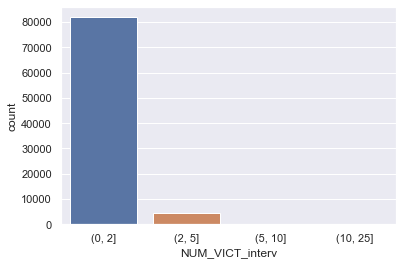

In [38]:
dfm_accidentes['NUM_VICT_interv'] = num_vict_discrt
dfm_accidentes['RNG_HORA_interv'] = rango_dscrt
dfm_accidentes['DIA_SEM_interv'] = dia_sem_dscrt

sns.countplot(x="NUM_VICT_interv", data=dfm_accidentes)
conteo(dfm_accidentes.NUM_VICT_interv, tabla=True)

### Numero de victimas con rango de hora.

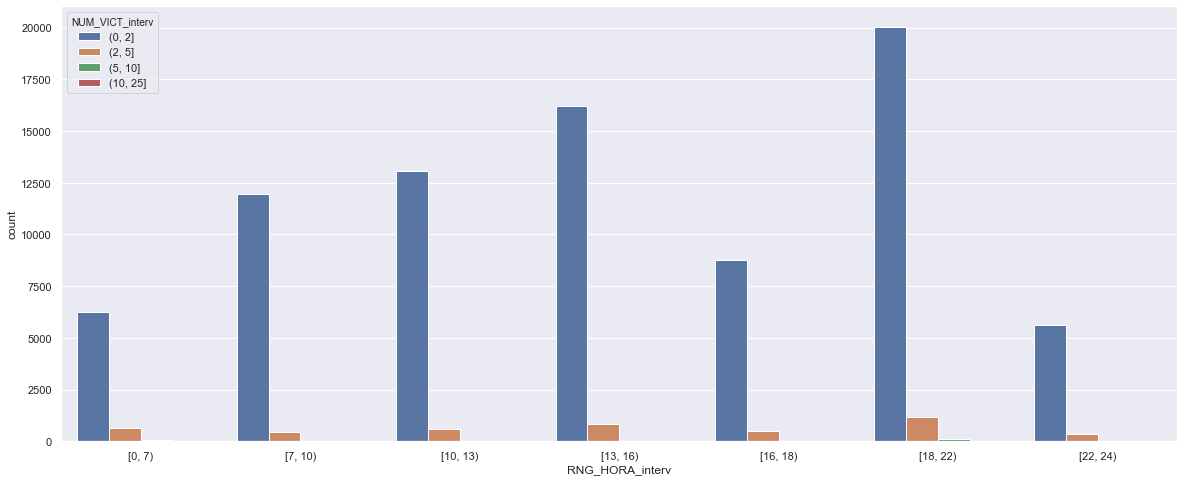

In [39]:
fig_biv1 = plt.figure(figsize=(20,8))
sns.countplot(x="RNG_HORA_interv", hue="NUM_VICT_interv", data=dfm_accidentes)

In [40]:
cruzada_vict_hora = pd.crosstab(dfm_accidentes.NUM_VICT_interv, dfm_accidentes.RNG_HORA_interv)
cruzada_vict_hora

RNG_HORA_interv,"[0, 7)","[7, 10)","[10, 13)","[13, 16)","[16, 18)","[18, 22)","[22, 24)"
NUM_VICT_interv,,,,,,,
"(0, 2]",6247,11970,13081,16215,8788,20027,5613
"(2, 5]",631,441,592,855,506,1191,363
"(5, 10]",52,17,30,32,30,89,29
"(10, 25]",1,1,6,4,2,4,0


#### Test chi cuadrado de independencia

In [41]:
from scipy import stats

stats.chi2_contingency(cruzada_vict_hora)

(405.18171562933253,
 7.5989436091927505e-75,
 18,
 array([[6.54172652e+03, 1.17309362e+04, 1.29390461e+04, 1.61452566e+04,
         8.80221346e+03, 2.01140865e+04, 5.66773449e+03],
        [3.65562609e+02, 6.55544317e+02, 7.23055519e+02, 9.02223919e+02,
         4.91882396e+02, 1.12400877e+03, 3.16722474e+02],
        [2.22738519e+01, 3.99425343e+01, 4.40560144e+01, 5.49728049e+01,
         2.99705588e+01, 6.84862297e+01, 1.92980062e+01],
        [1.43702270e+00, 2.57693770e+00, 2.84232351e+00, 3.54663257e+00,
         1.93358444e+00, 4.41846643e+00, 1.24503265e+00]]))

p-valor significativo, en la tabla esperada menor de 5 los correspondientes a la minoritaria, pero **parece que SI HAY RELACION**

### Numero de victimas con dia de la semana.

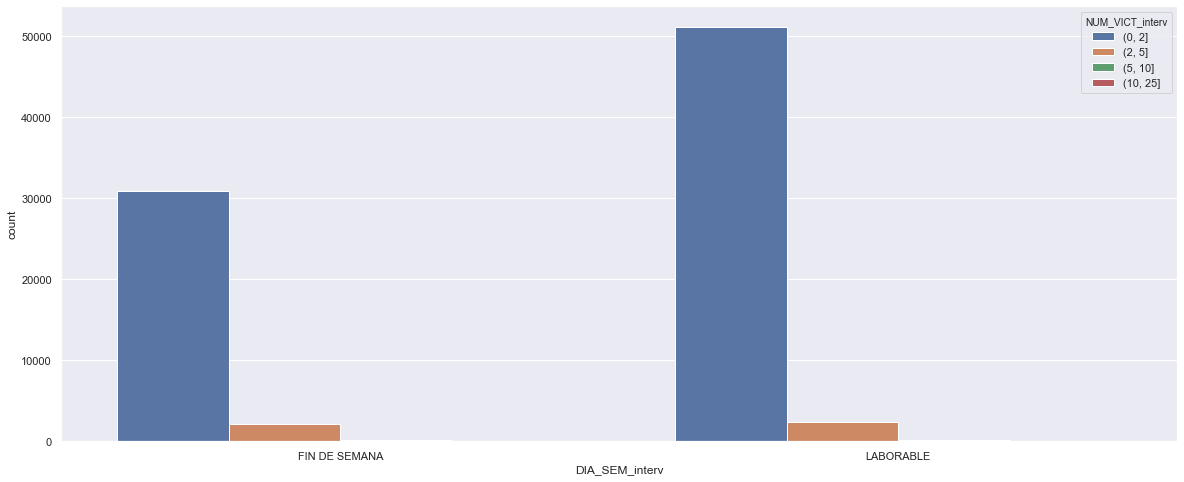

In [42]:
fig_biv2 = plt.figure(figsize=(20,8))
sns.countplot(x="DIA_SEM_interv", hue="NUM_VICT_interv", data=dfm_accidentes)

In [43]:
cruzada_vict_dia = pd.crosstab(dfm_accidentes.NUM_VICT_interv, dfm_accidentes.DIA_SEM_interv)
cruzada_vict_dia

DIA_SEM_interv,FIN DE SEMANA,LABORABLE
NUM_VICT_interv,,
"(0, 2]",30834,51107
"(2, 5]",2171,2408
"(5, 10]",148,131
"(10, 25]",3,15


In [44]:
stats.chi2_contingency(cruzada_vict_dia)

(205.5000166118439,
 2.7332698486985516e-44,
 3,
 array([[3.12938226e+04, 5.06471774e+04],
        [1.74875110e+03, 2.83024890e+03],
        [1.06551989e+02, 1.72448011e+02],
        [6.87432185e+00, 1.11256782e+01]]))

*Significativo, hay relacion*

### Numero de victimas con lluvia.

Lluvia,0,1
NUM_VICT_interv,,
"(0, 2]",71710,10231
"(2, 5]",4046,533
"(5, 10]",258,21
"(10, 25]",18,0


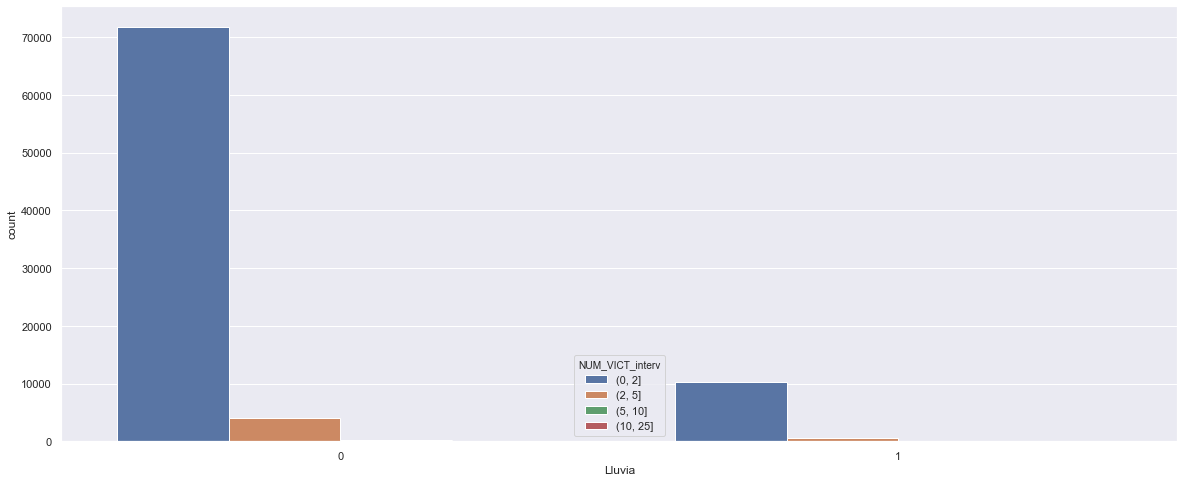

In [45]:
fig_biv3 = plt.figure(figsize=(20,8))
sns.countplot(x="Lluvia", hue="NUM_VICT_interv", data=dfm_accidentes)

cruzada_vict_lluvia = pd.crosstab(dfm_accidentes.NUM_VICT_interv, dfm_accidentes.Lluvia)
cruzada_vict_lluvia

In [46]:
stats.chi2_contingency(cruzada_vict_lluvia)

(11.577853431131233,
 0.008978455277713557,
 3,
 array([[7.17617300e+04, 1.01792700e+04],
        [4.01016538e+03, 5.68834618e+02],
        [2.44340717e+02, 3.46592833e+01],
        [1.57639172e+01, 2.23608279e+00]]))

*significativo, si hay relacion*

### Numero de victimas con niebla.

Niebla,0,1
NUM_VICT_interv,,
"(0, 2]",81713,228
"(2, 5]",4571,8
"(5, 10]",277,2
"(10, 25]",18,0


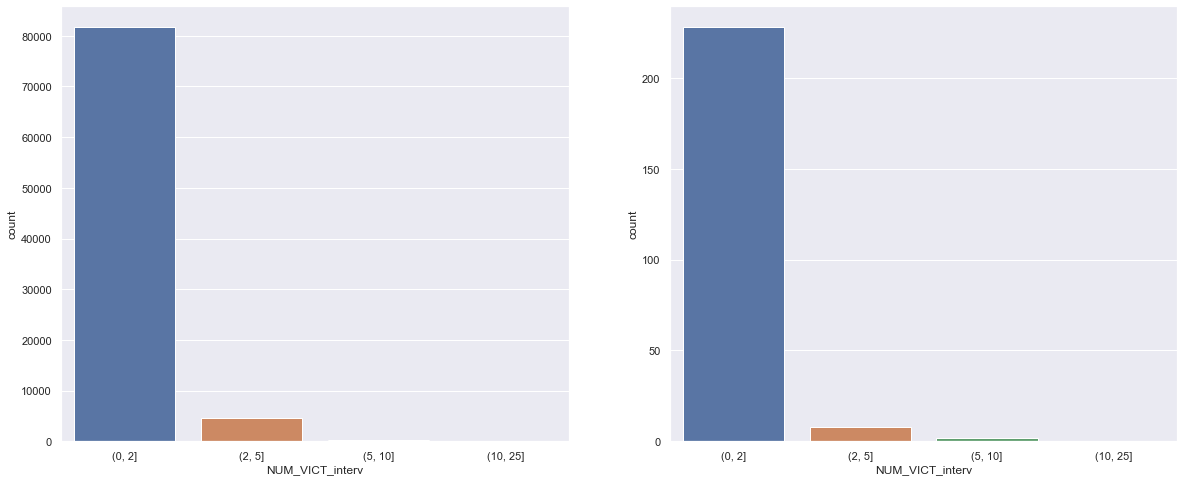

In [47]:
fig_biv4 = plt.figure(figsize=(20,8))

ax_b1=fig_biv4.add_subplot(121)
sns.countplot(x=dfm_accidentes[dfm_accidentes.Niebla==0]['NUM_VICT_interv'])

ax2_b2=fig_biv4.add_subplot(122)
sns.countplot(x=dfm_accidentes[dfm_accidentes.Niebla==1]['NUM_VICT_interv'])


cruzada_vict_niebla = pd.crosstab(dfm_accidentes.NUM_VICT_interv, dfm_accidentes.Niebla)
cruzada_vict_niebla

In [48]:
stats.chi2_contingency(cruzada_vict_niebla)

(3.756045964474339,
 0.28904028430662776,
 3,
 array([[8.17163671e+04, 2.24632941e+02],
        [4.56644714e+03, 1.25528641e+01],
        [2.78235150e+02, 7.64850202e-01],
        [1.79506548e+01, 4.93451743e-02]]))

*No significativo, no se puede afirmar que haya relacion. Dudas tabla esperada menores de 5 en las dos ultimas filas.*

### Numero de victimas con superficie mojada.

supf_Mojada,0,1
NUM_VICT_interv,,
"(0, 2]",70116,11825
"(2, 5]",3962,617
"(5, 10]",255,24
"(10, 25]",17,1


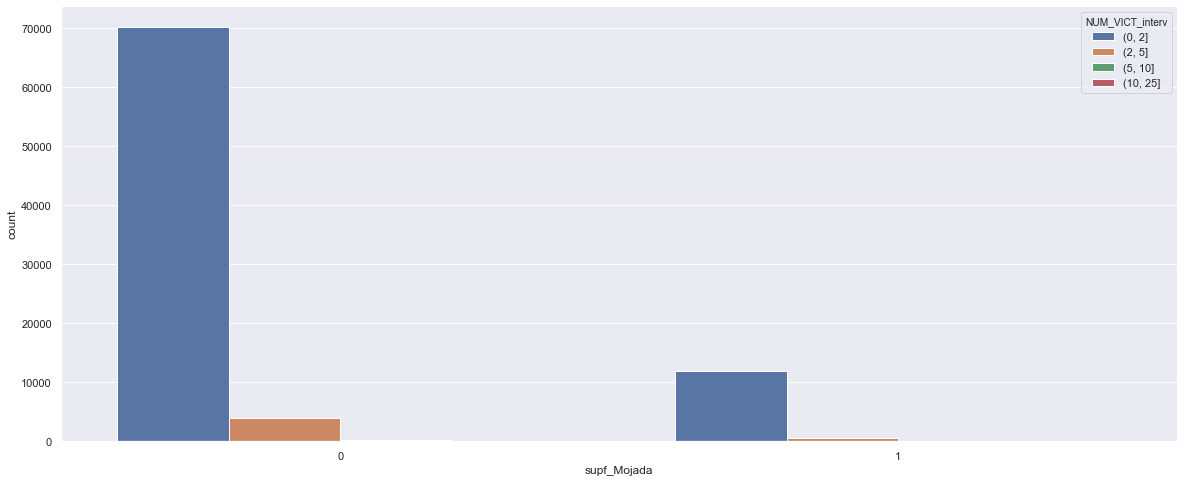

In [49]:
fig_biv5 = plt.figure(figsize=(20,8))
sns.countplot(x="supf_Mojada", hue="NUM_VICT_interv", data=dfm_accidentes)

cruzada_vict_spfcmojada = pd.crosstab(dfm_accidentes.NUM_VICT_interv, dfm_accidentes.supf_Mojada)
cruzada_vict_spfcmojada

In [50]:
stats.chi2_contingency(cruzada_vict_spfcmojada)

(11.912003270881765,
 0.007690760083385115,
 3,
 array([[7.01741980e+04, 1.17668020e+04],
        [3.92145144e+03, 6.57548556e+02],
        [2.38935347e+02, 4.00646532e+01],
        [1.54151837e+01, 2.58481634e+00]]))

*significativo, parece que si hay relacion (menores de 5 esperada ultima fila)*

### Numero de victimas con superficie grava suelta.

supf_Grava_Suelta,0,1
NUM_VICT_interv,,
"(0, 2]",81593,348
"(2, 5]",4570,9
"(5, 10]",279,0
"(10, 25]",18,0


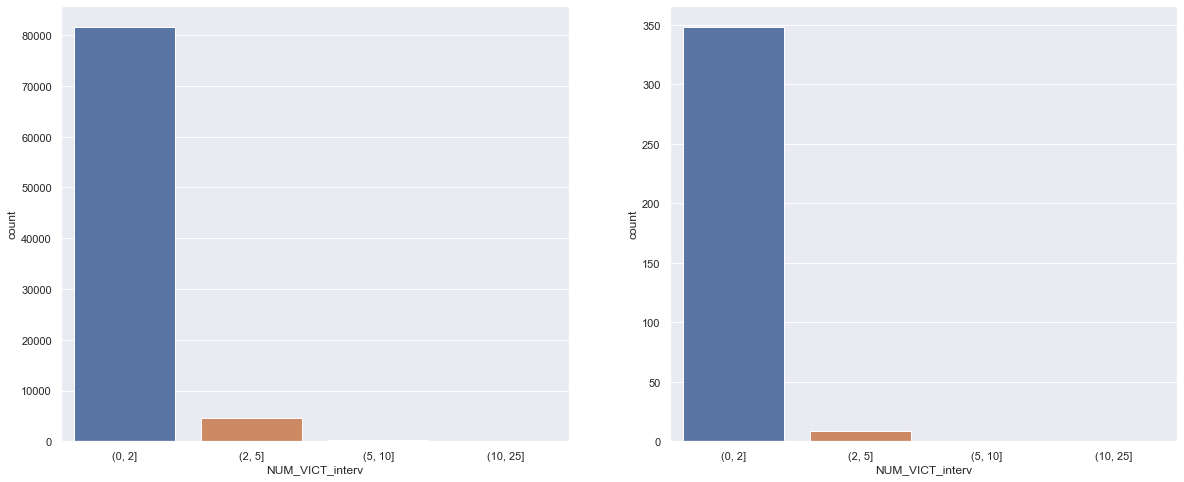

In [51]:
fig_biv6 = plt.figure(figsize=(20,8))

ax_b2=fig_biv6.add_subplot(121)
sns.countplot(x=dfm_accidentes[dfm_accidentes.supf_Grava_Suelta==0]['NUM_VICT_interv'])

ax2_b2=fig_biv6.add_subplot(122)
sns.countplot(x=dfm_accidentes[dfm_accidentes.supf_Grava_Suelta==1]['NUM_VICT_interv'])


cruzada_vict_spfcgrava = pd.crosstab(dfm_accidentes.NUM_VICT_interv, dfm_accidentes.supf_Grava_Suelta)
cruzada_vict_spfcgrava

In [52]:
stats.chi2_contingency(cruzada_vict_spfcgrava)

(6.742537261477834,
 0.0805728246812488,
 3,
 array([[8.16040506e+04, 3.36949411e+02],
        [4.56017070e+03, 1.88292961e+01],
        [2.77852725e+02, 1.14727530e+00],
        [1.79259822e+01, 7.40177615e-02]]))

*No significativo, no se puede afirmar que haya relacion*

In [53]:
dfm_accidentes.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'LUGAR_ACCIDENTE',
       'NUM_CALLE', 'NUM_PARTE', 'Granizo', 'Hielo', 'Lluvia', 'Niebla',
       'Seco', 'Nieve', 'supf_Mojada', 'supf_Aceite', 'supf_Barro',
       'supf_Grava_Suelta', 'supf_Hielo', 'supf_Seca_Limpia', 'NUM_VICTIMAS',
       'TIPO_ACCIDENTE', 'vehiculos_implic', 'tipo_persona_implic',
       'n_hombres', 'n_mujeres', 'n_sex_na', 'n_ilesos', 'n_hgraves',
       'n_hleves', 'n_muertos', 'n_lesiv_na', 'tr_edad_implic',
       'FUNC_GRAVEDAD', 'NUM_VICT_interv', 'RNG_HORA_interv',
       'DIA_SEM_interv'],
      dtype='object')

### Numero de victimas con DISTRITO.

DISTRITO,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTIN,CHAMBERI,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,...,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS,TETUAN,USERA,VICALVARO,VILLA DE VALLECAS,VILLAVERDE
NUM_VICT_interv,,,,,,,,,,,,,,,,,,,,,
"(0, 2]",4164,1236,4797,6024,6112,4987,5250,4658,2926,3863,...,2016,4726,4284,6323,3804,4591,2546,1083,1845,2003
"(2, 5]",235,49,339,216,265,157,285,241,140,285,...,139,380,281,285,227,189,248,71,122,192
"(5, 10]",7,1,18,14,14,12,17,11,4,10,...,3,38,18,18,15,15,19,3,12,15
"(10, 25]",0,0,0,2,0,0,2,1,1,1,...,2,1,2,1,0,3,0,0,0,1


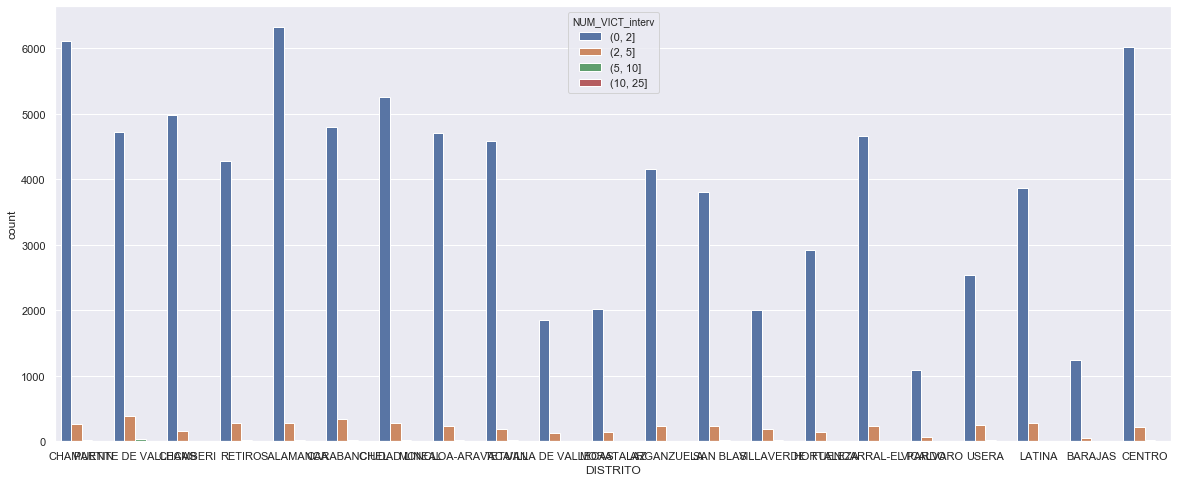

In [54]:
fig_biv7 = plt.figure(figsize=(20,8))
sns.countplot(x="DISTRITO", hue="NUM_VICT_interv", data=dfm_accidentes)

cruzada_vict_distrito = pd.crosstab(dfm_accidentes.NUM_VICT_interv, dfm_accidentes.DISTRITO)
cruzada_vict_distrito

In [55]:
stats.chi2_contingency(cruzada_vict_distrito)

(473.35543773630025,
 1.4882519426436616e-65,
 60,
 array([[4.15854091e+03, 1.21377295e+03, 4.86453015e+03, 5.90463729e+03,
         6.03205514e+03, 4.86641782e+03, 5.24206450e+03, 4.63517803e+03,
         2.89852000e+03, 3.92541344e+03, 4.67387530e+03, 2.03868551e+03,
         4.85603563e+03, 4.32748753e+03, 6.25480041e+03, 3.81875999e+03,
         4.52852457e+03, 2.65501034e+03, 1.09201812e+03, 1.86785122e+03,
         2.08682114e+03],
        [2.32386215e+02, 6.78276605e+01, 2.71838073e+02, 3.29960998e+02,
         3.37081320e+02, 2.71943559e+02, 2.92935324e+02, 2.59021493e+02,
         1.61974141e+02, 2.19358662e+02, 2.61183962e+02, 1.13925153e+02,
         2.71363385e+02, 2.41827234e+02, 3.49528698e+02, 2.13398689e+02,
         2.53061520e+02, 1.48366414e+02, 6.10237972e+01, 1.04378647e+02,
         1.16615052e+02],
        [1.41593697e+01, 4.13276202e+00, 1.65631846e+01, 2.01046339e+01,
         2.05384775e+01, 1.65696119e+01, 1.78486472e+01, 1.57822661e+01,
         9.86913853e+

*parece que hay relacion, dudas dos ultimas filas menores que 5*

### FUNCIÓN GRAVEDAD

### Gravedad con Hora.

In [56]:
gravedad_dscrt = pd.cut(dfm_accidentes.FUNC_GRAVEDAD, bins=8)

dfm_accidentes['GRAVEDAD_interv'] = gravedad_dscrt

RNG_HORA_interv,"[0, 7)","[7, 10)","[10, 13)","[13, 16)","[16, 18)","[18, 22)","[22, 24)"
GRAVEDAD_interv,,,,,,,
"(0.949, 7.375]",6710,12336,13597,16974,9253,21091,5923
"(7.375, 13.75]",185,85,94,120,65,191,70
"(13.75, 20.125]",22,5,14,11,7,26,10
"(20.125, 26.5]",5,3,2,0,1,1,2
"(26.5, 32.875]",4,0,0,1,0,2,0
"(32.875, 39.25]",3,0,1,0,0,0,0
"(39.25, 45.625]",2,0,0,0,0,0,0
"(45.625, 52.0]",0,0,1,0,0,0,0


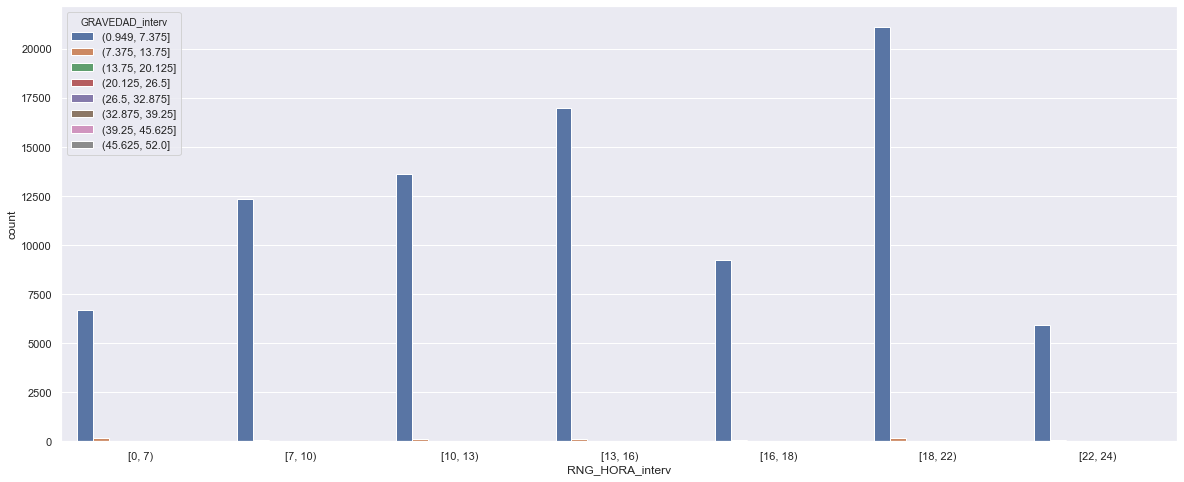

In [57]:
fig_biv8 = plt.figure(figsize=(20,8))
sns.countplot(x="RNG_HORA_interv", hue="GRAVEDAD_interv", data=dfm_accidentes)

cruzada_grave_hora = pd.crosstab(dfm_accidentes.GRAVEDAD_interv, dfm_accidentes.RNG_HORA_interv)
cruzada_grave_hora

In [58]:
stats.chi2_contingency(cruzada_grave_hora)

(401.7971591244683,
 2.948137521455175e-60,
 42,
 array([[6.85651432e+03, 1.22954287e+04, 1.35616729e+04, 1.69221662e+04,
         9.22577587e+03, 2.10819762e+04, 5.94046581e+03],
        [6.46660216e+01, 1.15962196e+02, 1.27904558e+02, 1.59598466e+02,
         8.70112996e+01, 1.98830989e+02, 5.60264695e+01],
        [7.58428649e+00, 1.36005045e+01, 1.50011518e+01, 1.87183386e+01,
         1.02050290e+01, 2.33196839e+01, 6.57100568e+00],
        [1.11768432e+00, 2.00428488e+00, 2.21069606e+00, 2.75849200e+00,
         1.50389901e+00, 3.43658500e+00, 9.68358732e-01],
        [5.58842162e-01, 1.00214244e+00, 1.10534803e+00, 1.37924600e+00,
         7.51949503e-01, 1.71829250e+00, 4.84179366e-01],
        [3.19338378e-01, 5.72652821e-01, 6.31627446e-01, 7.88140572e-01,
         4.29685430e-01, 9.81881429e-01, 2.76673923e-01],
        [1.59669189e-01, 2.86326411e-01, 3.15813723e-01, 3.94070286e-01,
         2.14842715e-01, 4.90940714e-01, 1.38336962e-01],
        [7.98345946e-02, 1.4316320

*dudas tabla esperada*

### Gravedad con Lluvia.

Lluvia,0,1
GRAVEDAD_interv,,
"(0.949, 7.375]",75188,10696
"(7.375, 13.75]",736,74
"(13.75, 20.125]",85,10
"(20.125, 26.5]",12,2
"(26.5, 32.875]",5,2
"(32.875, 39.25]",4,0
"(39.25, 45.625]",1,1
"(45.625, 52.0]",1,0


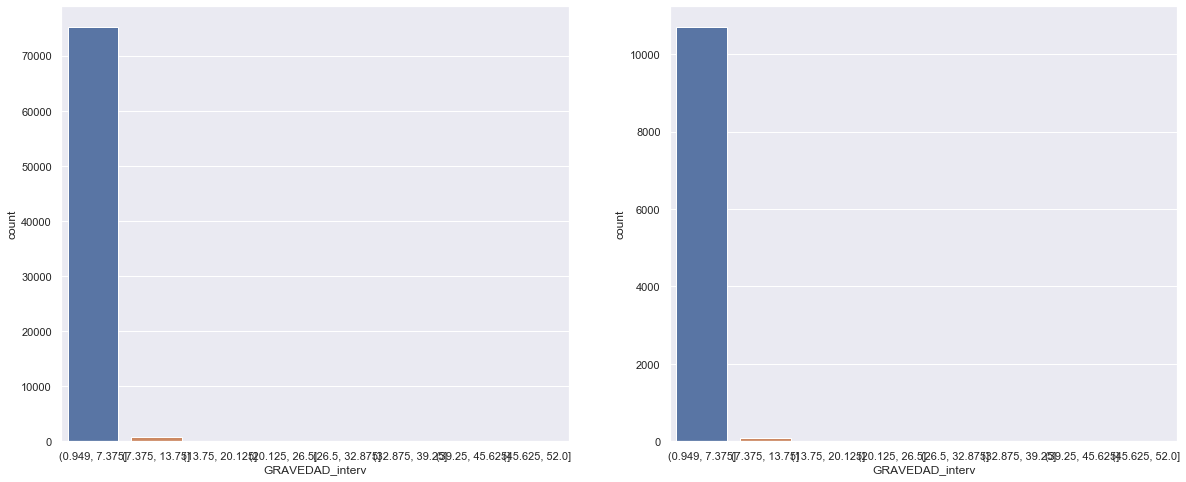

In [59]:
fig_biv9 = plt.figure(figsize=(20,8))

ax_b3=fig_biv9.add_subplot(121)
sns.countplot(x=dfm_accidentes[dfm_accidentes.Lluvia==0]['GRAVEDAD_interv'])

ax2_b4=fig_biv9.add_subplot(122)
sns.countplot(x=dfm_accidentes[dfm_accidentes.Lluvia==1]['GRAVEDAD_interv'])


cruzada_grave_lluvia = pd.crosstab(dfm_accidentes.GRAVEDAD_interv, dfm_accidentes.Lluvia)
cruzada_grave_lluvia



In [60]:
stats.chi2_contingency(cruzada_grave_lluvia)

(13.46263258491531,
 0.06160721070826418,
 7,
 array([[7.52149036e+04, 1.06690964e+04],
        [7.09376274e+02, 1.00623726e+02],
        [8.31984519e+01, 1.18015481e+01],
        [1.22608245e+01, 1.73917551e+00],
        [6.13041225e+00, 8.69587754e-01],
        [3.50309271e+00, 4.96907288e-01],
        [1.75154636e+00, 2.48453644e-01],
        [8.75773178e-01, 1.24226822e-01]]))

*no significativo, no podemos afirmar que haya relacion*

In [61]:
dfm_accidentes.columns

Index(['FECHA', 'RANGO_HORARIO', 'DIA_SEMANA', 'DISTRITO', 'LUGAR_ACCIDENTE',
       'NUM_CALLE', 'NUM_PARTE', 'Granizo', 'Hielo', 'Lluvia', 'Niebla',
       'Seco', 'Nieve', 'supf_Mojada', 'supf_Aceite', 'supf_Barro',
       'supf_Grava_Suelta', 'supf_Hielo', 'supf_Seca_Limpia', 'NUM_VICTIMAS',
       'TIPO_ACCIDENTE', 'vehiculos_implic', 'tipo_persona_implic',
       'n_hombres', 'n_mujeres', 'n_sex_na', 'n_ilesos', 'n_hgraves',
       'n_hleves', 'n_muertos', 'n_lesiv_na', 'tr_edad_implic',
       'FUNC_GRAVEDAD', 'NUM_VICT_interv', 'RNG_HORA_interv', 'DIA_SEM_interv',
       'GRAVEDAD_interv'],
      dtype='object')

### Gravedad con DISTRITO.

DISTRITO,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTIN,CHAMBERI,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,...,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS,TETUAN,USERA,VICALVARO,VILLA DE VALLECAS,VILLAVERDE
GRAVEDAD_interv,,,,,,,,,,,,,,,,,,,,,
"(0.949, 7.375]",4366,1271,5100,6212,6319,5102,5505,4859,3045,4101,...,2139,5069,4536,6563,3999,4750,2774,1143,1951,2176
"(7.375, 13.75]",37,14,43,37,65,41,40,47,24,54,...,16,66,44,60,42,43,31,13,24,29
"(13.75, 20.125]",2,1,8,5,7,12,7,1,1,3,...,4,8,3,4,4,4,6,1,4,5
"(20.125, 26.5]",0,0,2,0,0,1,1,2,0,0,...,0,2,0,0,1,1,0,0,0,1
"(26.5, 32.875]",0,0,0,2,0,0,0,1,1,0,...,0,0,1,0,0,0,2,0,0,0
"(32.875, 39.25]",1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"(39.25, 45.625]",0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
"(45.625, 52.0]",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


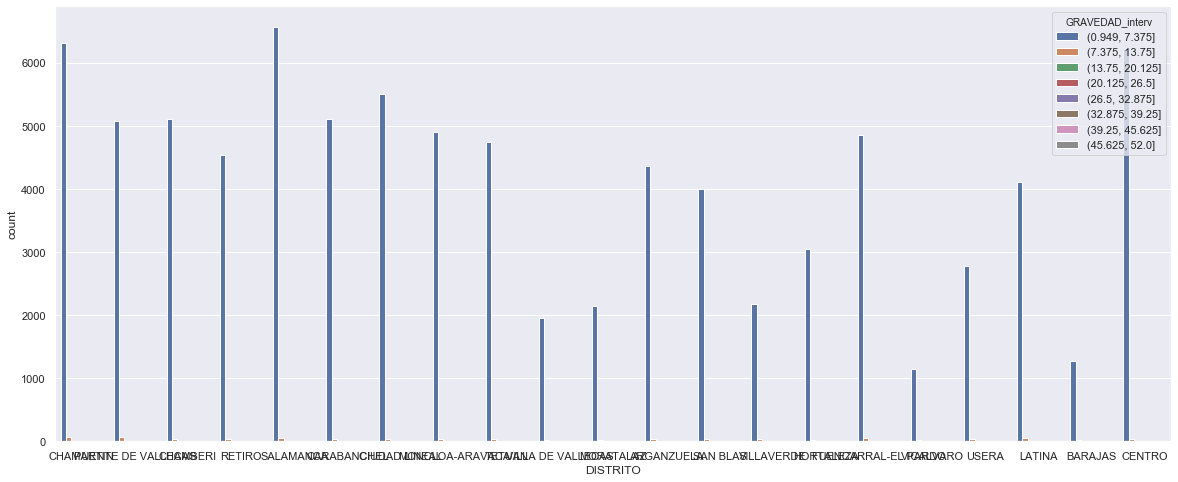

In [62]:
fig_biv10 = plt.figure(figsize=(20,8))
sns.countplot(x="DISTRITO", hue="GRAVEDAD_interv", data=dfm_accidentes)

cruzada_grave_distrito = pd.crosstab(dfm_accidentes.GRAVEDAD_interv, dfm_accidentes.DISTRITO)
cruzada_grave_distrito

In [63]:
stats.chi2_contingency(cruzada_grave_distrito)

(182.42790904893224,
 0.009240003215190916,
 140,
 array([[4.35864985e+03, 1.27217969e+03, 5.09861129e+03, 6.18876837e+03,
         6.32231756e+03, 5.10058979e+03, 5.49431259e+03, 4.85822274e+03,
         3.03799675e+03, 4.11430430e+03, 4.89878213e+03, 2.13678703e+03,
         5.08970801e+03, 4.53572618e+03, 6.55578133e+03, 4.00251868e+03,
         4.74643713e+03, 2.78276941e+03, 1.14456602e+03, 1.95773220e+03,
         2.18723895e+03],
        [4.11078475e+01, 1.19983413e+01, 4.80866651e+01, 5.83682919e+01,
         5.96278379e+01, 4.81053250e+01, 5.18186530e+01, 4.58194824e+01,
         2.86523377e+01, 3.88033450e+01, 4.62020111e+01, 2.01527351e+01,
         4.80026953e+01, 4.27779122e+01, 6.18297108e+01, 3.77490584e+01,
         4.47651958e+01, 2.62452054e+01, 1.07947752e+01, 1.84640105e+01,
         2.06285635e+01],
        [4.82129076e+00, 1.40721287e+00, 5.63979405e+00, 6.84566387e+00,
         6.99338839e+00, 5.64198256e+00, 6.07749634e+00, 5.37388991e+00,
         3.36045936e+0

*dudas menores 5 tabla esperada, por grafica puede que si*